In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv("house_prices.csv")
df.head

<bound method NDFrame.head of               Suburb           Address  Rooms Type    Price Method   SellerG  \
0         Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

         

In [49]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  
    df['DaysSince'] = (df['Date'] - df['Date'].min()).dt.days
    df.drop('Date', axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DaysSince
0,0,2,0,1480000,1,217,2.5,2,1,1.0,202,NaN,NaN,10,-37.79960,144.99840,2,4019,3.0
1,0,2,0,1035000,1,217,2.5,2,1,0.0,156,79.0,1900.0,10,-37.80790,144.99340,2,4019,24.0
2,0,3,0,1465000,3,217,2.5,3,2,0.0,134,150.0,1900.0,10,-37.80930,144.99440,2,4019,390.0
3,0,3,0,850000,0,217,2.5,3,2,1.0,94,NaN,NaN,10,-37.79690,144.99690,2,4019,390.0
4,0,4,0,1600000,4,144,2.5,3,1,2.0,120,142.0,2014.0,10,-37.80720,144.99410,2,4019,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,50,4,0,1245000,1,150,16.7,4,2,2.0,652,NaN,1981.0,31,-37.90562,145.16761,4,7392,NaN
13576,54,3,0,1031000,3,247,6.8,3,2,2.0,333,133.0,1995.0,31,-37.85927,144.87904,6,6380,NaN
13577,54,3,0,1170000,1,257,6.8,3,2,4.0,436,NaN,1997.0,31,-37.85274,144.88738,6,6380,NaN
13578,54,4,0,2500000,0,207,6.8,4,1,5.0,866,157.0,1920.0,31,-37.85908,144.89299,6,6380,NaN


In [45]:
columns_to_drop = ['Address', 'Postcode'] 
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns_to_drop, axis=1)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,1480000,1,217,3/12/2016,2.5,2,1,1.0,202,NaN,NaN,10,-37.79960,144.99840,2,4019
1,0,2,0,1035000,1,217,4/2/2016,2.5,2,1,0.0,156,79.0,1900.0,10,-37.80790,144.99340,2,4019
2,0,3,0,1465000,3,217,4/3/2017,2.5,3,2,0.0,134,150.0,1900.0,10,-37.80930,144.99440,2,4019
3,0,3,0,850000,0,217,4/3/2017,2.5,3,2,1.0,94,NaN,NaN,10,-37.79690,144.99690,2,4019
4,0,4,0,1600000,4,144,4/6/2016,2.5,3,1,2.0,120,142.0,2014.0,10,-37.80720,144.99410,2,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,50,4,0,1245000,1,150,26/08/2017,16.7,4,2,2.0,652,NaN,1981.0,31,-37.90562,145.16761,4,7392
13576,54,3,0,1031000,3,247,26/08/2017,6.8,3,2,2.0,333,133.0,1995.0,31,-37.85927,144.87904,6,6380
13577,54,3,0,1170000,1,257,26/08/2017,6.8,3,2,4.0,436,NaN,1997.0,31,-37.85274,144.88738,6,6380
13578,54,4,0,2500000,0,207,26/08/2017,6.8,4,1,5.0,866,157.0,1920.0,31,-37.85908,144.89299,6,6380


In [21]:
print(df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [63]:
df[col] = df[col].fillna(df[col].mode()[0])
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DaysSince
0,0,2,0,1480000,1,132,2.5,2,1,1.0,202,126.0,1970.0,2,-37.79960,144.99840,2,4019,3.0
1,0,2,0,1035000,1,132,2.5,2,1,0.0,156,79.0,1900.0,2,-37.80790,144.99340,2,4019,24.0
2,0,3,0,1465000,3,132,2.5,3,2,0.0,134,150.0,1900.0,2,-37.80930,144.99440,2,4019,390.0
3,0,3,0,850000,0,132,2.5,3,2,1.0,94,126.0,1970.0,2,-37.79690,144.99690,2,4019,390.0
4,0,4,0,1600000,4,51,2.5,3,1,2.0,120,142.0,2014.0,2,-37.80720,144.99410,2,4019,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,260,4,0,1245000,1,58,16.7,4,2,2.0,652,126.0,1981.0,25,-37.90562,145.16761,4,7392,304.0
13576,264,3,0,1031000,3,165,6.8,3,2,2.0,333,133.0,1995.0,25,-37.85927,144.87904,6,6380,304.0
13577,264,3,0,1170000,1,176,6.8,3,2,4.0,436,126.0,1997.0,25,-37.85274,144.88738,6,6380,304.0
13578,264,4,0,2500000,0,121,6.8,4,1,5.0,866,157.0,1920.0,25,-37.85908,144.89299,6,6380,304.0


In [70]:
categorical_cols = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0]) 
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 70012788778.77


In [72]:
feature_importances = model.feature_importances_
top_indices = np.argsort(feature_importances)[-5:]

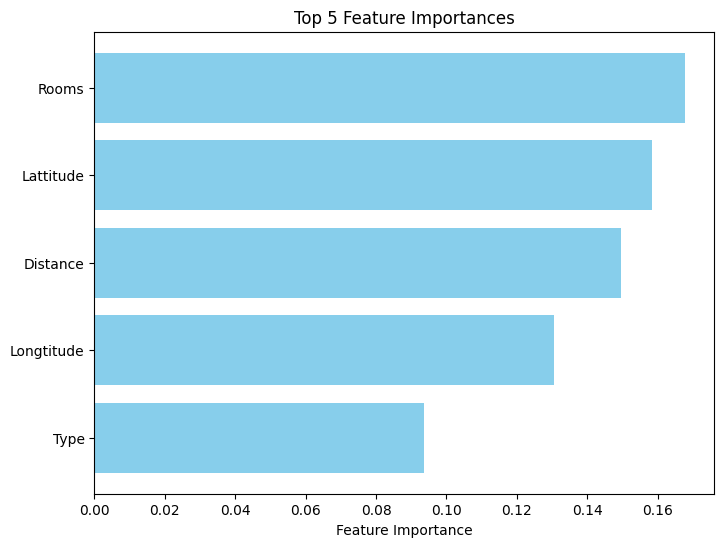

In [74]:
plt.figure(figsize=(8, 6))
plt.barh(X.columns[top_indices], feature_importances[top_indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 5 Feature Importances')
plt.show()


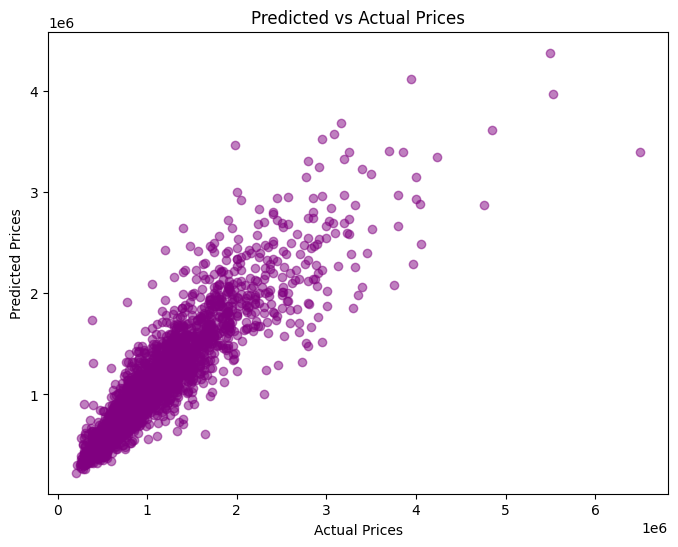

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()
